The Sparks Foundation:

Data Science & Business Analytics Intern- July 21

Author :- Rucha Mahajan

TASK1- SUPERVISED MACHINE LEARNING PREDICTION

In this task, we will be predicting the percentage score for students based upon their number of hours of study. For this, as below we will load the dataset and ten we have to perform regression analysis on its variable. By doing this regression analysis we get an idea about the relation between two variables. Further we can run Machine Learning methods to generate the predicted value. Lastly, we will determine the mean differnce between acual and predicted values. As I am doing supervised learning task, so here input and output both are shown. 

In [1]:
#importing all the required libraries

import pandas as pd
import numpy as np
from numpy import corrcoef
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import seaborn as sns

In [2]:
# Importing data given by TSF

df = pd.read_csv(r"C:/Users/RUCHA MAHAJAN/Desktop/SPARK FOUNDATION/task1.csv")

In [3]:
# Check the type of the dataframe

type(df)

pandas.core.frame.DataFrame

In [4]:
# Get the dimensions of the array

df.shape

(25, 2)

In [5]:
# Reading the data

df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [6]:
# Reading first 5 students hours and scores from dataset

df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [7]:
# Reading last 5 students hours and scores from dataset

df.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [8]:
# Stastical description of the given dataset

df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [9]:
#To check null values in given dataset

df.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [10]:
# To check if duplicate values are there or not

df.duplicated().sum()

0

In [11]:
# To get a brief description of the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
Hours     25 non-null float64
Scores    25 non-null int64
dtypes: float64(1), int64(1)
memory usage: 480.0 bytes


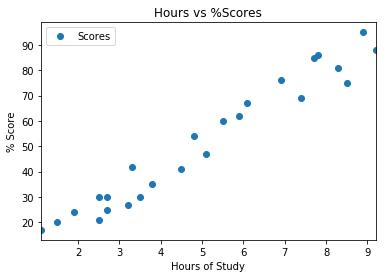

In [12]:
# Plotting the distribution of hours and scores

df.plot(x='Hours', y='Scores', style = "o")
plt.rcParams["figure.figsize"] = [7,4]
plt.title('Hours vs %Scores')
plt.xlabel('Hours of Study')
plt.ylabel('% Score')
plt.show()

From this above graph, we can clearly say that there is a positive linear relation between the number of hours studied and percentage of score by the student.

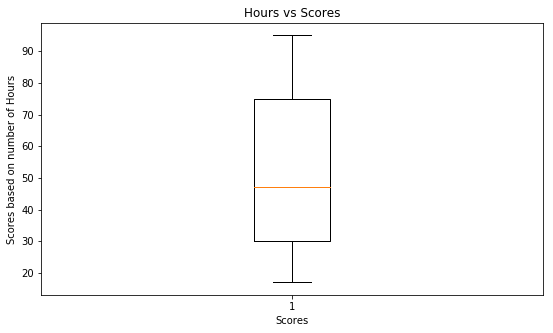

In [13]:
# BoxPlot

plt.rcParams["figure.figsize"] = [9,5]
d_sr = df['Scores']
plt.boxplot(d_sr)
plt.title('Hours vs Scores')
plt.xlabel('Scores')
plt.ylabel('Scores based on number of Hours')
plt.show()

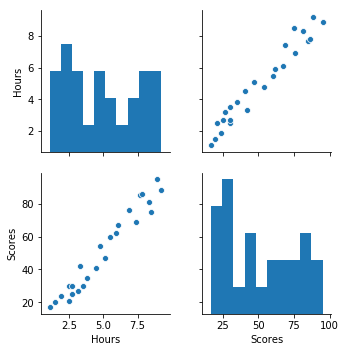

In [14]:
#A pairplot plot a pairwise relationships in given dataset. 
#The pairplot function creates a grid of Axes such that each variable in data will by shared in the y-axis across a single row
#and in the x-axis across a single column. 

sns.pairplot(df, diag_kind="hist")
plt.show()

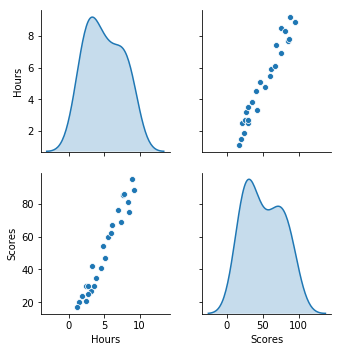

In [30]:
sns.pairplot(df, diag_kind="kde")
plt.show()

A kernel density estimate (KDE) plot is a method for visualizing the distribution of observations in a dataset, analagous to a histogram. KDE represents the data using a continuous probability density curve in one or more dimensions.

In [15]:
# corr() can also be used to find pairwise correlation of all columns in given dataset

df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


In [16]:
# preparing the data

x=df.iloc[:,:-1].values
y=df.iloc[:,1].values

In [17]:
# Splitting the data

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [18]:
# Training the model

reg=LinearRegression()
reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [19]:
# Plotting the regression line

lr=reg.coef_*x+reg.intercept_

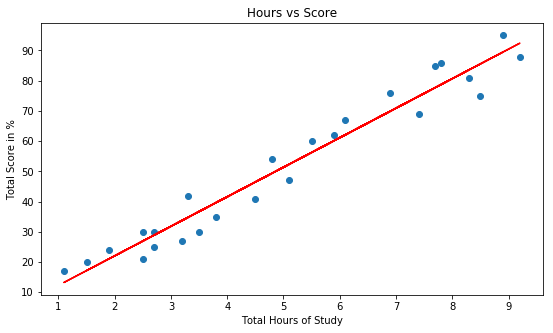

In [20]:
# Plotting the test data

plt.scatter(df.Hours,df.Scores)
m,b=np.polyfit(df.Hours,df.Scores,1)
plt.title("Hours vs Score")
plt.xlabel("Total Hours of Study")
plt.ylabel("Total Score in %")
plt.plot(df.Hours, m*df.Hours+b, color='red')
plt.show()

In [21]:
# Predicting values
# Testing data in hours

print(x_test)

#Predicting the scores of student

y_pred = reg.predict(x_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [22]:
y_pred = reg.predict(x_test)
print(y_pred)

[16.88414476 33.73226078 75.357018   26.79480124 60.49103328]


In [23]:
# Comparing the actual and predicted values

cmp=pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(cmp)

   Actual  Predicted
0      20  16.884145
1      27  33.732261
2      69  75.357018
3      30  26.794801
4      62  60.491033


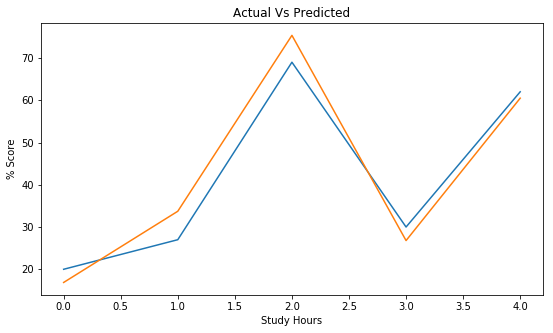

In [24]:
# Plotting the acutal vs predicted graph

plt.plot(cmp)
plt.xlabel('Study Hours')
plt.ylabel('% Score')
plt.title('Actual Vs Predicted')
plt.show()

In [25]:
# The predicted score if student studies 9.25 hrs/day

pred_value = reg.predict([[9.25]])
print("The prediction score if student studies 9.25 hrs/day is:")
pred_value[0]

The prediction score if student studies 9.25 hrs/day is:


93.69173248737538

In [26]:
# Evaluating the model

print("R-squared value for the given model is:")
reg.score(x_train,y_train)

R-squared value for the given model is:


0.9515510725211553

R-squared also called as coefficient of determination, measures how close the data are to the fitted regression line or how much variablity of the response variable is explained by the predictor variable. Here, R-squared value is 0.9515.. So, predictor variable is able to explain 95.15% variance response variable.

In [27]:
from sklearn.metrics import mean_absolute_error

print("Mean Absolute Error for the given model is:",mean_absolute_error(y_test,y_pred))

Mean Absolute Error for the given model is: 4.183859899002975


Mean Absolute Error (MSE), measures the absolute average distance between actual data and predicted data.

Thank You!